<a href="https://colab.research.google.com/github/diegorrojas/SeriesDeTiempo-Tec/blob/main/series1_DARS_A01721803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Diego Rojas A01721803
### Sesión 6 - 3 marzo 2023


In [4]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [6]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [7]:
# importamos datos
procesos = pd.read_csv("https://raw.githubusercontent.com/jaime-escobedo-tec/SeriesDeTiempo-Tec/main/procesos.csv")

In [8]:
procesos.head()

,ruido_blanco,caminata_aleatoria
0,0.000000,0.000000
1,0.706032,0.706032
2,1.915985,2.622017
3,-2.141755,0.480261
4,0.719057,1.199318


Graficamos el proceso de Ruido blanco

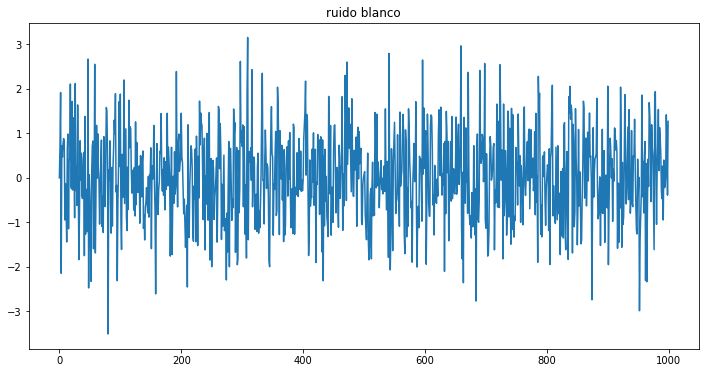

In [9]:
# figsize=( 12,6)
procesos['ruido_blanco'].plot()
plt.title('ruido blanco')
plt.show()

menciona si este proceso es estacionario¿?

**El ruido blanco es estacionario**



Graficamos la caminata aleatoria pura

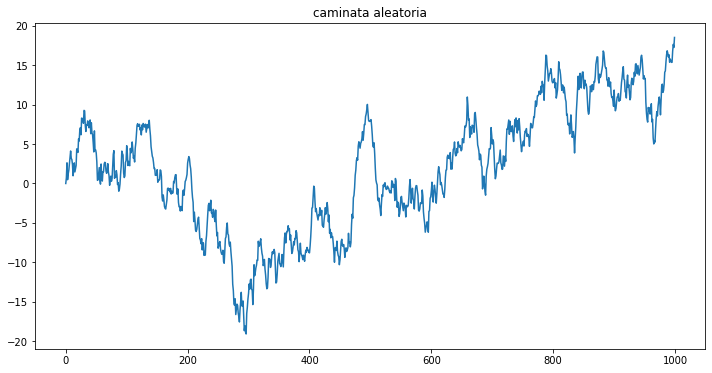

In [10]:
procesos['caminata_aleatoria'].plot()
plt.title('caminata aleatoria')
plt.show()

menciona si este proceso es estacionario¿?
¿a qué variable económica o financiera se parece la caminata aleatoria?
**caminata aleatoria es no estacionaria. El precio de las acciones, el tipo de cambio, la inflación, entre otros son caminatas aleatorias.**

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

como ejemplo utilizaremos la inflación de Estados Unidos 

In [11]:
# importamos la base de datos
inflacion_usa = pd.read_csv('https://raw.githubusercontent.com/jaime-escobedo-tec/SeriesDeTiempo-Tec/main/inflaci%C3%B3nUSA1.csv', index_col= 'mes', parse_dates = True)

In [ ]:
# vemos el dataframe
inflacion_usa.tail()

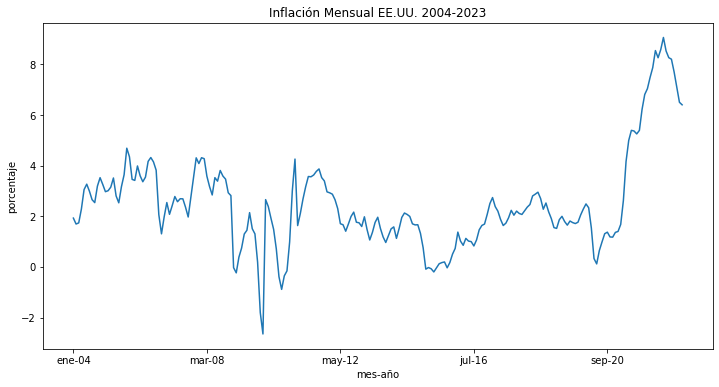

In [13]:
# comenzamos graficando la serie
# titulo y nombre a ejes
inflacion_usa['inflacion_usa'].plot()
plt.ylabel('porcentaje')
plt.xlabel('mes-año')
plt.title('Inflación Mensual EE.UU. 2004-2023')
plt.show()

In [14]:
## vamos a verificar que la serie sea estacionaria
## Dickey Fuller Aumentada (Aumented dickey fuller)
result_adf = adfuller(inflacion_usa)
print('p-value: %.2f' % result_adf[1])

p-value: 0.18


Recuerde que

 **$H_0:$ serie No estacionaria**

 **$H_a:$ serie estacionaria**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$

con un $\alpha=0.05$

conclusión: .18>.05, No rechazamos H0, la serie es no estacionaria.

**¿Cómo diferenciar una serie?**

In [15]:
# diferenciar serie
inflacion_usa['inflacion_diff'] = inflacion_usa['inflacion_usa'].diff()

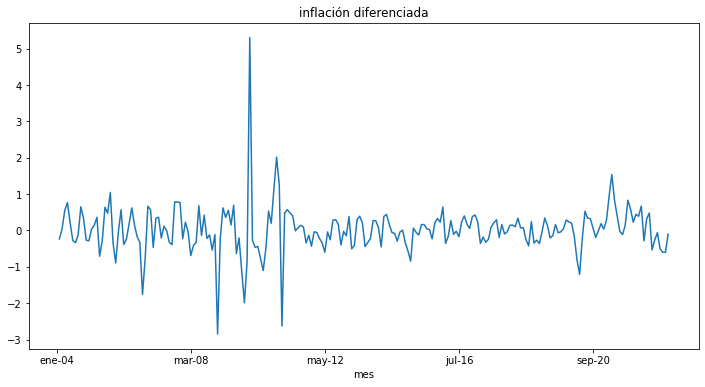

In [16]:
# graficamos esta nueva serie
inflacion_usa['inflacion_diff'].plot()
plt.title('inflación diferenciada')
plt.show()

Realizamos la prueba de raices unitaria

In [17]:
#result_adf = adfuller(inflacion_usa['inflacion_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.18


Conclusión

si la serie es estacionaria, tratamos de identificar que proceso es para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

ValueError: ignored

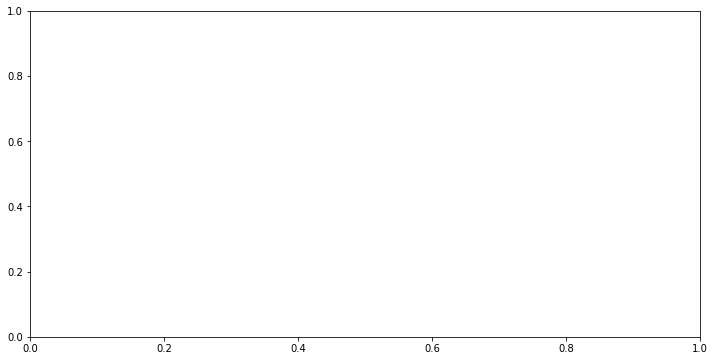

In [20]:
plot_acf(inflacion_usa, zero=False, lags=30);

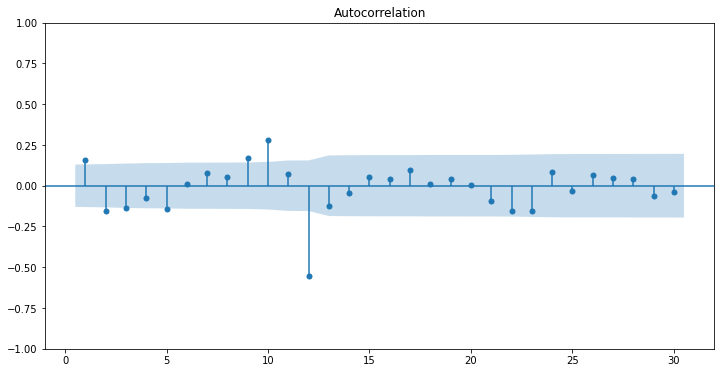

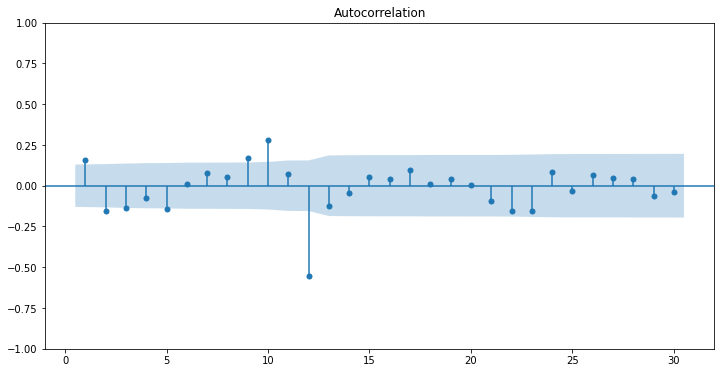

In [19]:
plot_acf(inflacion_usa['inflacion_diff'].dropna(), zero= False, lags= 30)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


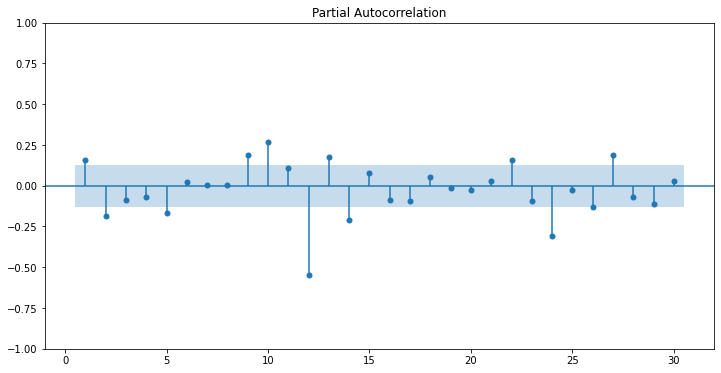

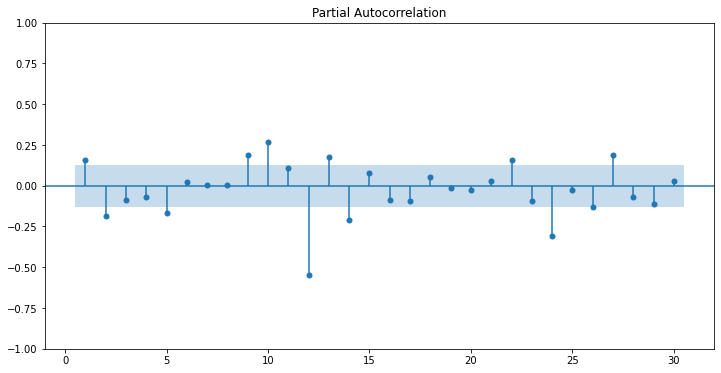

In [21]:
plot_pacf(inflacion_usa['inflacion_diff'].dropna(), zero=False, lags=30)

In [ ]:
plot_pacf(serie, zero = False,  lags=20);

Comentarios

In [ ]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflacion_usa['inflacion_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

In [ ]:
vamos a elegir el modelo que tiene el mejor criterio de akaike. el valor mas pequeño

verificamos que serie tiene el "mejor" c riterio de Akaike (AIC)

In [24]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
4  4   397.817875  432.111332
3  4   410.062419  440.926530
   3   416.706834  444.141599
2  2   427.888703  448.464777
4  3   436.578816  467.442927
2  1   440.161969  457.308697
0  3   440.267575  457.414304
2  4   441.234734  468.669499
1  2   441.789790  458.936518
3  1   442.149836  462.725910
1  3   442.245054  462.821128
0  4   442.262910  462.838984
2  0   442.625754  456.343137
   3   442.814480  466.819899
3  0   442.883696  460.030424
4  1   443.326656  467.332076
   0   443.676556  464.252629
3  2   444.111525  468.116944
1  4   444.152306  468.157726
0  2   445.143542  458.860925
4  2   446.103462  473.538227
0  1   446.295195  456.583232
1  1   447.167560  460.884943
   0   448.648464  458.936501
0  0   452.246376  459.105067

El criterio de Akaike (AIC) y el criterio bayesiano de información (BIC) nos ayudan para elegir el modelo adecuado.
Elegir solo uno, BIC o AIC

Entre mas grande es el modelo BIC o AIC, peor es el modelo.

el mejor modelo segun aice es ARMA (4,4)

In [25]:
modelo1 = ARIMA(inflacion_usa['inflacion_diff'].dropna(), order=(4, 0, 4)) #AR (2)
resultado1 = modelo1.fit() #calcula
print(resultado1.summary() ) #muestra

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         inflacion_diff   No. Observations:                  228
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -188.909
Date:                Tue, 07 Mar 2023   AIC                            397.818
Time:                        14:05:47   BIC                            432.111
Sample:                             0   HQIC                           411.654
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.040      0.457      0.647      -0.060       0.096
ar.L1          0.7979      0.056     14.365      0.000       0.689       0.907
ar.L2         -0.5685      0.092     -6.169      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
##realizamos pronóstico
inflacion_usa['inflacion_diff_pronosticada'] = resultado1.predict()


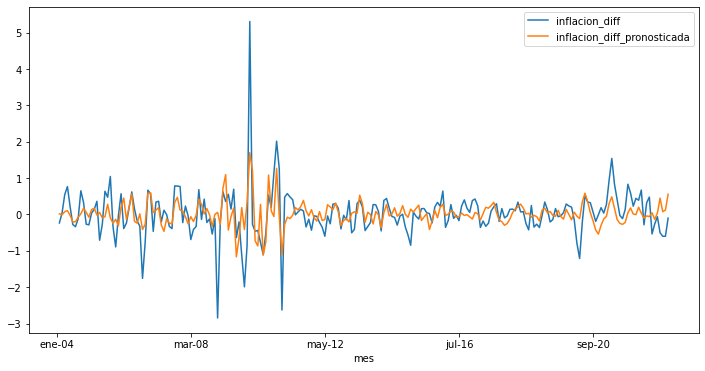

In [27]:
inflacion_usa[['inflacion_diff','inflacion_diff_pronosticada']].plot();

In [28]:
modelo2 = ARIMA (inflacion_usa['inflacion_usa'], order=(4,1,4))
resultado2 = modelo2.fit()
print( resultado2.summary() )

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          inflacion_usa   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -189.096
Date:                Tue, 07 Mar 2023   AIC                            396.192
Time:                        14:23:04   BIC                            427.056
Sample:                             0   HQIC                           408.644
                                - 229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7973      0.056     14.221      0.000       0.687       0.907
ar.L2         -0.5669      0.093     -6.125      0.000      -0.748      -0.386
ar.L3          0.5847      0.090      6.467      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
#pronostico
inflacion_usa['inflacion_pronosticada'] =resultado2.predict()

In [36]:
inflacion_usa[['inflacion_usa','inflacion_pronosticada']].plot;

In [30]:
inflacion_usa[['inflacion_usa','inflacion_pronosticada']]

,inflacion_usa,inflacion_pronosticada
mes,,
ene-04,1.926252,0.000000
feb-04,1.693064,1.926252
mar-04,1.737242,1.667720
abr-04,2.285092,1.796717
may-04,3.051771,2.367202
...,...,...
sep-22,8.201670,8.280123
oct-22,7.700000,8.638753
nov-22,7.100000,7.757517


In [31]:
inflacion_usa.describe()

,inflacion_usa,inflacion_diff,inflacion_diff_pronosticada,inflacion_pronosticada
count,229.000000,228.000000,228.000000,229.000000
mean,2.506888,0.019622,0.020633,2.479338
std,1.902673,0.648078,0.328533,1.888224
min,-2.649237,-2.845069,-1.163017,-1.483494
25%,1.473896,-0.268544,-0.126499,1.438088
50%,2.127112,0.001298,0.014372,2.077494
75%,3.255562,0.304898,0.162788,3.162773
max,9.059758,5.305575,1.698408,9.088433


In [33]:
inflacion_usa.tail()

,inflacion_usa,inflacion_diff,inflacion_diff_pronosticada,inflacion_pronosticada
mes,,,,
sep-22,8.20167,-0.061023,0.035586,8.280123
oct-22,7.70000,-0.501670,0.449730,8.638753
nov-22,7.10000,-0.600000,0.076858,7.757517
dic-22,6.50000,-0.600000,0.120236,7.200897
ene-23,6.40000,-0.100000,0.556002,7.040021


In [34]:
resultado2.predict(229,232)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


229    6.481743
230    6.346643
231    6.341729
232    5.904269
Name: predicted_mean, dtype: float64

El modelo pronositca que para febrero la inflacion en Estados Unidos sera de 6.3466%